<a href="https://colab.research.google.com/github/ymuto0302/base2_2020/blob/master/GIS4_WDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 地理情報の活用：オープンデータと地理情報を重ねる
（モチベーション）経営情報学科のカリキュラムには「外国事情」（４年次）という科目があるから，その内容と地理情報を絡めてみよう！

## これまでの授業
- geopandas に付随するデータセットを利用する (人口／GDP)
- ESRIジャパンの提供する日本地図 ＋ 政府統計データ → 商圏人口の推定

## 今回の授業
利用するデータセットは "World Development Indicators" である。

https://datacatalog.worldbank.org/dataset/world-development-indicators

名称のとおり「開発」に関する多数の指標およぼその値が提供されている。

## World Development Indicators にて提供される指標
500種超の指標が含まれる。

国名(CountryName / CountryCode)×指標(IndicatorName / IndicatorCode) ×年度(1996〜2014)に対して「指標の値」が示されている。

- 対象となる国（地域）数：247カ国
- 指標：511種類
- 年度：指標によって収集された件数が異なる

詳細は Excel ファイル "WDI_code_name.xlsx" を参照


### (準備) Google Drive のマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## World Development Indicators のデータを全て読み込む

In [4]:
import pandas as pd
indicators = pd.read_csv(r"/content/drive/My Drive/BASE2/GeoData/WorldDevelopmentIndicators/Indicators.csv")

### データの中身を確認

In [5]:
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


なんと！ Indicators.csv には 565万件ものデータが格納されている！

In [6]:
len(indicators)

5656458

## Access to electricity (% of population) を見てみよう
各国にて電気を利用可能な国民が人口の何％を占めるかを集計した結果である。

- IndicatorName : Access to electricity (% of population)
- IndicatorCode : EG.ELC.ACCS.ZS

In [7]:
# Access to electricity (% of population) を取り出す
data = indicators[indicators['IndicatorCode'] == 'EG.ELC.ACCS.ZS']

In [8]:
data['Year'].unique()

array([1990, 2000, 2010, 2012])

'Year' 値を確認すると，1990年，2000年，2010年，2012年のデータが格納されている。

そこで 2012年のデータに絞って調べていこう。

In [9]:
# 2012年のデータのみに絞り込む
data = data[data['Year'] == 2012]

In [10]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5202284,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,86.270751
5202795,Caribbean small states,CSS,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,93.456157
5203260,Central Europe and the Baltics,CEB,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,100.000000
5203847,East Asia & Pacific (all income levels),EAS,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,96.118489
5204419,East Asia & Pacific (developing only),EAP,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,95.713725


In [11]:
len(data)

245

データ件数は 245件。ただし，この中には南極大陸の値も含まれるなど，若干，無駄がある。

### アフリカのみを取り出す
Wikipedia 上の国名コードの一覧 ( https://ja.wikipedia.org/wiki/ISO_3166-1 )から
アフリカ大陸に含まれる国名・国コードを抽出した。

その結果をファイル Africa.csv に格納した。

In [16]:
# アフリカ大陸に含まれる国の情報を取得
africa = pd.read_csv('/content/drive/My Drive/BASE2/GeoData/Africa.csv')

In [17]:
africa.head()

,国・地域名,ISO 3166-1における英語名,numeric,alpha-3,alpha-2,場所,各行政区分
0,ガーナ,Ghana,288,GHA,GH,西アフリカ,ISO 3166-2:GH
1,カーボベルデ,Cape Verde,132,CPV,CV,西アフリカ,ISO 3166-2:CV
2,ガンビア,Gambia,270,GMB,GM,西アフリカ,ISO 3166-2:GM
3,ギニア,Guinea,324,GIN,GN,西アフリカ,ISO 3166-2:GN
4,ギニアビサウ,Guinea-Bissau,624,GNB,GW,西アフリカ,ISO 3166-2:GW


In [18]:
# アフリカの国コード
africa_iso_a3 = africa['alpha-3']

In [19]:
africa_iso_a3.head()

0    GHA
1    CPV
2    GMB
3    GIN
4    GNB
Name: alpha-3, dtype: object

## geopandas の提供する naturalearth_lowres データセットに上記の値を被せたい

In [22]:
!pip install geopandas

     |████████████████████████████████| 972kB 8.3MB/s 
     |████████████████████████████████| 14.8MB 342kB/s 
     |████████████████████████████████| 6.5MB 47.3MB/s 


最初に geopandas に含まれるデータセットを読み込む

In [23]:
import geopandas
import matplotlib.pyplot as plt

dataset = geopandas.datasets.get_path('naturalearth_lowres')
world = geopandas.read_file(dataset)

In [24]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


データフレーム world のうち "iso_a3" が国コードを表す。

In [25]:
# CountryCode が「アフリカ諸国の国コードのリスト」に含まれるデータのみ取り出す
africa_data = data[data['CountryCode'].isin(africa_iso_a3)]

In [26]:
africa_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5225509,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,100.00
5226618,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,37.00
5237325,Benin,BEN,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,38.40
5241530,Botswana,BWA,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,53.24
5244986,Burkina Faso,BFA,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,13.10


In [27]:
# 後のマージのため，列名 CountryCode を iso_a3 へリネーム
africa_data.rename({'CountryCode':'iso_a3'}, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
africa_data.head()

,CountryName,iso_a3,IndicatorName,IndicatorCode,Year,Value
5225509,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,100.00
5226618,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,37.00
5237325,Benin,BEN,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,38.40
5241530,Botswana,BWA,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,53.24
5244986,Burkina Faso,BFA,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,13.10


In [29]:
len(africa_data)

50

In [30]:
# 国コードをキーとしてマージする
wv = world.merge(africa_data, how='inner', on='iso_a3', copy=True)

In [31]:
wv.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,CountryName,IndicatorName,IndicatorCode,Year,Value
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,15.30000
1,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...",Somalia,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,32.70795
2,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",Kenya,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,23.00000
3,37345935,Africa,Sudan,SDN,176300.0,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...",Sudan,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,32.56256
4,12075985,Africa,Chad,TCD,30590.0,"POLYGON ((23.83766 19.58047, 23.88689 15.61084...",Chad,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,6.40000


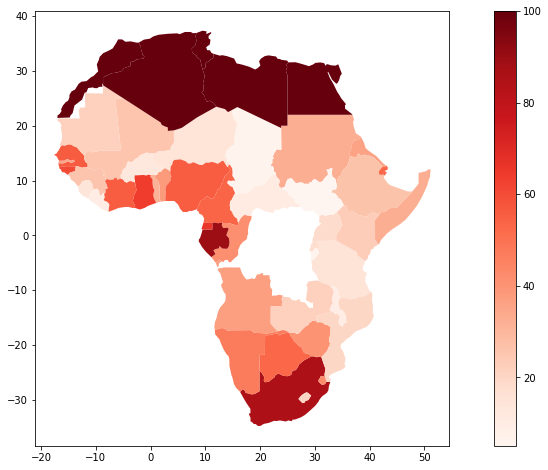

In [32]:
import matplotlib.pyplot as plt
wv.plot(column='Value', cmap='Reds', legend=True, figsize=(16, 8))

# (参考) Colormap として Paired を用いると，値のない領域が明確になる
# wv.plot(column='Value', cmap='Paired', legend=~True, figsize=(16, 8))


## 真ん中（コンゴ民主共和国）と左上（西サハラっぽい？）の値がない！

参考：
- 左上：西サハラは data の中にない。（国境が未確定だから？ Google maps と形が異なるし・・・）

### 原因を調査してみる
geopandas のデータセット(データフレーム) world ／ World Development Indicators のデータセットに含まれる
"Congo" という国名を調べてみる。

In [33]:
world[world['name'].str.contains('Congo')]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
67,4954674,Africa,Congo,COG,30270.0,"POLYGON ((18.45307 3.50439, 18.39379 2.90044, ..."


In [34]:
data[data['CountryName'].str.contains('Congo')]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5255334,"Congo, Dem. Rep.",ZAR,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,16.4
5256220,"Congo, Rep.",COG,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,41.6


コンゴ民主共和国の国コードは
- world の中では 'COD'
- data の中では 'ZAR'
- (参考) Africa.csv では 'COD'

ということは・・・

**大元の africa_data を作る前に 'ZAR' → 'COD' へ変換する必要あり！**

### (参考) サハラについては相当に表記がふらついているようだ

In [35]:
world[world['name'].str.contains('Sahara')]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [36]:
data[data['CountryName'].str.contains('Sahara')]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5220874,Sub-Saharan Africa (all income levels),SSF,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,35.306103
5221456,Sub-Saharan Africa (developing only),SSA,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012,35.274149


## データの改善
コンゴ民主共和国の国コードを予め変換する！

**africa_data を作る前に 'ZAR' → 'COD' へ変換する。**

In [37]:
# 予め国コードを修正 ・・・ここがポイント！
data.replace({'CountryCode':{'ZAR':'COD'}}, inplace=True)

# CountryCode が「アフリカ諸国の国コードのリスト」に含まれるデータのみ取り出す
africa_data = data[data['CountryCode'].isin(africa_iso_a3)]

# 後のマージのため，列名 CountryCode を iso_a3 へリネーム
africa_data.rename({'CountryCode':'iso_a3'}, axis=1, inplace=True)

# 国コードをキーとしてマージする
wv = world.merge(africa_data, how='inner', on='iso_a3', copy=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


改めて描画する

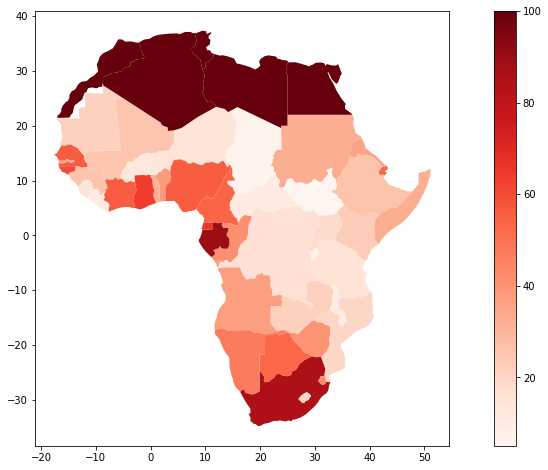

In [38]:
import matplotlib.pyplot as plt
wv.plot(column='Value', cmap='Reds', legend=True, figsize=(16, 8))

(メモ) 真ん中：南スーダン (South Sudan) は値が約 5% と小さいため，ほぼ白に見える

### コメント
- 北アフリカは地中海を介してヨーロッパと交易が多いのか，電気の整備状況が優れている。
- 南東部は大西洋と接しており，港を介して国が発展しているようだ。
- 中央アフリカの国々の電気の整備率は極めて低い

## 以上のコードをまとめると・・・

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


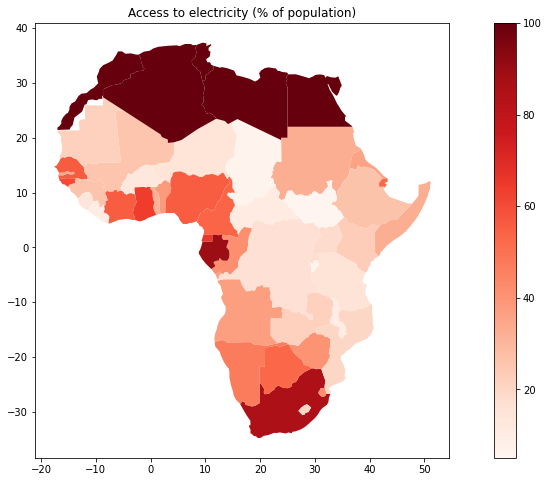

In [40]:
import pandas as pd

# World Development Indicators のデータを読み込む
indicators = pd.read_csv("/content/drive/My Drive/BASE2/GeoData/WorldDevelopmentIndicators/Indicators.csv")

# Access to electricity (% of population) を取り出す
data = indicators[indicators['IndicatorCode'] == 'EG.ELC.ACCS.ZS']

# 2012年のデータのみに絞り込む
data = data[data['Year'] == 2012]

# 予め国コードを修正
data.replace({'CountryCode':{'ZAR':'COD'}}, inplace=True)

###############################################
# アフリカのみを取り出したい！

# アフリカ大陸に含まれる国の情報を取得
africa = pd.read_csv('/content/drive/My Drive/BASE2/GeoData/Africa.csv')

# アフリカの国コード
africa_iso_a3 = africa['alpha-3']

# CountryCode が「アフリカ諸国の国コードのリスト」に含まれるデータのみ取り出す
africa_data = data[data['CountryCode'].isin(africa_iso_a3)]

###############################################
# geopandas の提供する naturalearth_lowres データセットに上記の値を被せたい

import geopandas

dataset = geopandas.datasets.get_path('naturalearth_lowres')
world = geopandas.read_file(dataset)

# 後のマージのため，列名 CountryCode を iso_a3 へリネーム
africa_data.rename({'CountryCode':'iso_a3'}, axis=1, inplace=True)

# 国コードをキーとしてマージする
wv = world.merge(africa_data, how='inner', on='iso_a3', copy=True)

###############################################
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(16, 8))
ax.set_title("Access to electricity (% of population)")
wv.plot(ax=ax, column='Value', cmap='Reds', legend=True)
# wv.plot(column='Value', cmap='Paired', legend=True # こっちで色を塗ると，値のない領域が明確になる


# 課題
以下の２つの指標をアフリカ大陸に割り当て可視化せよ。
- "Improved water source (% of rural population with access)" (コードは "SH.H2O.SAFE.ZS")
- "Improved sanitation facilities (% of urban population with access)" (コードは "SH.STA.ACSN")

さらに，得られた結果について考察せよ。

# folium を使ってみよう
Leaflet を使用しているため，Google Colab で動かない可能性あり！

In [43]:
import folium
africa_map = folium.Map(location=[0.311106, 23.969148], zoom_start=3)
africa_map

In [44]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
world_geo = f'{url}/world-countries.json'

africa_map.choropleth(geo_data=world_geo,
                      data=africa_data, columns=['CountryName', 'Value'],
                      # data=africa_data, columns=['iso_a3', 'Value'],
                      key_on='properties.name',
                     fill_color='PuBu', fill_opacity=0.7)
africa_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### コメント
World Development Indicators と folium とで国名表記が異なるためか，一部の国のデータがマップに反映されていない。
→ 要改善！！